***
$\mathbf{\text{Binomial Tree Model}}$
***

We consider an european option $C(S(t),t)$ with maturity T on a non-dividend paying stock $S(t)$. In the binomial tree model we assume that at time $t+\Delta t$ the stock can take values $S(t+\Delta t)=uS(t)$ or $S(t+\Delta t)=d S(t)$ for constant $u,\,d$. 

Under risk-neutral probability Q, the price of the claim at time $t$ is given by the expected value of the claim's discounted value at $t+\Delta t$,

$$
C(S(t),t)=e^{-r\Delta t} E_t^Q[C(S(t+\Delta t),t+\Delta t)]=e^{-r\Delta t}(q C(u S(t),t+\Delta t)+(1-q)C(d S(t),t+\Delta t)),
$$

where $r$ is the risk-free interest rate (assumed to be constant), while $q$ is the risk-neutral probability for an up movement,

$$
q=\frac{e^{r \Delta t}-d}{u-d}.
$$

The previous recursion is fixed by imposing final conditions at maturity T. In the case of an European call option with strike price $K$ we have $C(S(T),T)=\text{max}(S(T)-K)$, while, for the corresponding put option,  $C(S(T),T)=\text{max}(K-S(T))$.

***
$\mathbf{\text{Convergence to Black-Scholes prices}}$
***

It is interesting to study the limit for $\Delta t\rightarrow 0$ and its relation to the Black-Sholes formula for the price of the European call and put options. We set

$$
\Delta t=\frac{T}{n},
$$

where n is the number of periods of the binomial tree and set,

$$
u=e^{\sigma \sqrt{\Delta t}},
$$

$$
d=e^{-\sigma \sqrt{\Delta t}},
$$

where $\sigma$ is the volatility of the stock in the Black-Sholes-Merton model. One can show that in the limit $\Delta t\rightarrow 0$ the price of the European call and put options in the binomial tree model converge to the Black-Sholes prices.

In [27]:
import math
import pylab as plt
import pandas as pd
from scipy.stats import norm

In [28]:
# In order to price american options need option value at any node of the tree.
# We represent binomial trees as matrices

def black_sholes_call(S0,K,s,r,T):
    
    d1=(1/(s*math.sqrt(T)))*(math.log(S0/K)+(r+(s**2)/2)*T)  
    d2=(1/(s*math.sqrt(T)))*(math.log(S0/K)+(r-(s**2)/2)*T)
    
    return S0*norm.cdf(d1)-K*math.exp(-r*T)*norm.cdf(d2)

def get_underlying_tree(S0,s,T,n):
    
    u=math.exp(s*(math.sqrt(T/n)))
    d=1/u
    
    tree=[[0.0 for i in range(n+1) ] for j in range(n+1)]
    for col in reversed(range(n+1)):
        for row in range(n-col,n+1):
            tree[row][col]= u**(n-row)*d**(col-(n-row))*S0
    return tree

def print_prices(tree):
    dim=len(tree)
    treef= [['{:.2f}'.format(float(item)) for item in row] for row in tree] 
    return pd.DataFrame(treef, columns=[i for i in range(dim) ])

def get_option_tree(putcall,euam,S0,K,s,r,T,n,return_full_tree=True):
    
    prices_under=get_underlying_tree(S0,s,T,n)
    
    R=math.exp(r*T/n)
    u=math.exp(s*(math.sqrt(T/n)))
    d=1/u
    q=(R-d)/(u-d)
    
    tree=[[0.0 for i in range(n+1) ] for j in range(n+1)]

    if putcall == "CALL":
        sign=1
    if putcall == "PUT":
        sign=-1
    
    for col in reversed(range(n+1)):
        for row in range(n-col,n+1):
            if col==n:
                tree[row][col]=max(sign*(prices_under[row][col]-K),0)
            else:
                
                if euam== "EU":
                    tree[row][col]=(q*tree[row-1][col+1]+(1-q)*tree[row][col+1])/R
                
                if euam == "AM":
                    payoff=max(sign*(prices_under[row][col]-K),0)
                    price=(q*tree[row-1][col+1]+(1-q)*tree[row][col+1])/R
                    tree[row][col]=max(payoff,price)
    if return_full_tree:
        return tree
    else:
        return tree[-1][0]

In [17]:
#n = number of periods 
#T = maturity (in years)
#S0= stock price at t=0
#K= strike price
#s= volatility (annualised)
#r= interest rate (annualised)


prices_under=get_underlying_tree(S0=100,s=0.2,T=1,n=10)
print_prices(prices_under)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,188.22
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,176.69,165.86
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,165.86,155.69,146.15
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,155.69,146.15,137.19,128.79
4,0.00,0.00,0.00,0.00,0.00,0.00,146.15,137.19,128.79,120.89,113.48
5,0.00,0.00,0.00,0.00,0.00,137.19,128.79,120.89,113.48,106.53,100.00
6,0.00,0.00,0.00,0.00,128.79,120.89,113.48,106.53,100.00,93.87,88.12
7,0.00,0.00,0.00,120.89,113.48,106.53,100.00,93.87,88.12,82.72,77.65
8,0.00,0.00,113.48,106.53,100.00,93.87,88.12,82.72,77.65,72.89,68.42
9,0.00,106.53,100.00,93.87,88.12,82.72,77.65,72.89,68.42,64.23,60.29


In [18]:
prices_eu_call=get_option_tree("CALL","EU",S0=100,K=100,s=0.2,r=0.05,T=1,n=10)
print_prices(prices_eu_call)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,88.22
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77.19,65.86
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66.85,56.19,46.15
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.18,47.15,37.69,28.79
4,0.00,0.00,0.00,0.00,0.00,0.00,48.13,38.68,29.78,21.39,13.48
5,0.00,0.00,0.00,0.00,0.00,39.66,30.77,22.38,14.48,7.03,0.00
6,0.00,0.00,0.00,0.00,31.88,23.65,16.06,9.28,3.66,0.00,0.00
7,0.00,0.00,0.00,24.94,17.58,11.09,5.74,1.91,0.00,0.00,0.00
8,0.00,0.00,19.01,12.68,7.42,3.46,0.99,0.00,0.00,0.00,0.00
9,0.00,14.12,8.90,4.84,2.05,0.52,0.00,0.00,0.00,0.00,0.00


In [19]:
prices_eu_put=get_option_tree("PUT","EU",S0=100,K=100,s=0.2,r=0.05,T=1,n=10)
print_prices(prices_eu_put)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.13,0.28,0.60,1.26,2.67,5.63,11.88
7,0.00,0.00,0.00,0.61,1.14,2.09,3.76,6.55,10.89,16.78,22.35
8,0.00,0.00,1.60,2.71,4.47,7.12,10.90,15.79,21.36,26.61,31.58
9,0.00,3.20,4.98,7.53,10.98,15.33,20.37,25.62,30.58,35.27,39.71


***
$\mathbf{\text{American options and early Exercise}}$
***

An American option gives the holder the right to excercise at any time before maturity. By assuming that the option pays the holder $g(\tau)$ if exercised at time $\tau\leq T$, no-arbitrage considerations lead to the following recursion for the pricing of an American option in the binomial tree model,

$$
A(S(t),t)=\text{max}\left(g(t),e^{-r\Delta t}(q A(u S(t),t+\Delta t)+(1-q)A(d S(t),t+\Delta t))\right).
$$

In the case of an American call option with strike price $K$ we have $g(t)=\text{max}(S(t)-K,0)$, while, for the corresponding put option, $g(t)=\text{max}(K-S(t),0)$.


In [20]:
prices_am_call=get_option_tree("CALL","AM",S0=100,K=100,s=0.2,r=0.05,T=1,n=10)
print_prices(prices_am_call)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,88.22
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77.19,65.86
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66.85,56.19,46.15
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.18,47.15,37.69,28.79
4,0.00,0.00,0.00,0.00,0.00,0.00,48.13,38.68,29.78,21.39,13.48
5,0.00,0.00,0.00,0.00,0.00,39.66,30.77,22.38,14.48,7.03,0.00
6,0.00,0.00,0.00,0.00,31.88,23.65,16.06,9.28,3.66,0.00,0.00
7,0.00,0.00,0.00,24.94,17.58,11.09,5.74,1.91,0.00,0.00,0.00
8,0.00,0.00,19.01,12.68,7.42,3.46,0.99,0.00,0.00,0.00,0.00
9,0.00,14.12,8.90,4.84,2.05,0.52,0.00,0.00,0.00,0.00,0.00


In [21]:
prices_am_put=get_option_tree("PUT","AM",S0=100,K=100,s=0.2,r=0.05,T=1,n=10)
print_prices(prices_am_put)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.15,0.31,0.65,1.38,2.90,6.13,11.88
7,0.00,0.00,0.00,0.67,1.24,2.28,4.10,7.14,11.88,17.28,22.35
8,0.00,0.00,1.75,2.96,4.88,7.78,11.91,17.28,22.35,27.11,31.58
9,0.00,3.52,5.50,8.34,12.24,17.28,22.35,27.11,31.58,35.77,39.71


***
$\mathbf{\text{Binomial trees and Black-Scholes prices}}$
***

In the following lines of code we study the convergence of binoimial prices to the Black-Sholes prices, in the case of an European call option. Specifically, for fixed number of periods we compute the relative error to the Black-Sholes price. The analysis is repeated for incresing number of periods until sub-permille error is achived.

In [24]:
bsprice=black_sholes_call(S0=100,K=100,s=0.2,r=0.05,T=1)

errlist=[100*abs(bsprice-get_option_tree("CALL","EU",S0=100,K=100,s=0.2,r=0.05,T=1,n=i+1,return_full_tree=False))/bsprice for i in range(300)]

Text(0, 0.5, 'Relative error (%)')

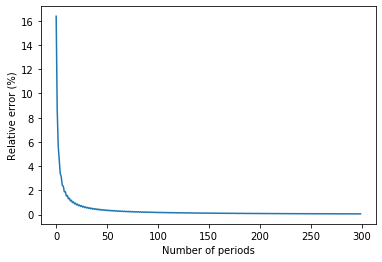

In [25]:
plt.plot(errlist)
plt.xlabel('Number of periods')
plt.ylabel('Relative error (%)')

In [26]:
min(errlist)

0.056110513452401076